# **Overview: Movie Recommendation** 

![](https://about.netflix.com/images/meta/netflix-symbol-black.png)

#### In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.…ever wondered how Netflix, Amazon Prime, Showmax, Disney and the likes somehow know what to recommend to you?

#### …it's not just a guess drawn out of the hat. There is an algorithm behind it.


# **Problem Statement**

#### With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

#### What value is achieved through building a functional recommender system?Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.


#### This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

#### For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

<a id="cont"></a>

# **Table of Contents**

<details>
<summary><a href=#one>1. Importing Packages</a></summary>
<br>
<a href=#one.one>1.1 Importing python packages that will be used in the notebook </a>
</details>

<br>

<details>
<summary><a href=#two>2. Loading Data</a></summary>
<br>
<a href=#two.one>2.1 Loading the Train and Test datasets</a>
</details>

<br>

<details>
<summary><a href=#three>3. Exploratory Data Analysis (EDA)</a></summary>
<br>
<a href=#three.one>3.1 Why is EDA important?</a>
<br>
<a href=#three.two>3.2 Pandas profiling model</a>
<br>
<a href=#three.three>3.3 Generating a word cloud</a>
<br>
<a href=#three.four>3.4 Looking at the data types of the Train and Test datasets</a>
<br>
<a href=#three.five>3.5 Looking for null values in the Train and Test datasets</a>
<br>
<a href=#three.six>3.6 Investigating the distribution of categorical values</a>
<br>
<a href=#three.seven> 3.7  Hashtags for each sentiment</a>
</details>

<br>

<details>
<summary><a href=#four>4. Data Engineering</a></summary>
<br>
<a href=#four.one>4.1 A copy of each dataset </a>
<br>
<a href=#four.two>4.2 Function to make all text lowercase </a>
<br>
<a href=#four.three>4.3 Function to remove URLs </a>
<br>
<a href=#four.four>4.4 Removing special characters </a>
<br>
<a href=#four.five>4.5 Removing punctuation </a>
<br>
<a href=#four.six>4.6 Removing digits</a>
<br>
<a href=#four.seven>4.7 Removing stopwords </a>
<br>
<a href=#four.eight>4.8 Tokenization </a>
<br>
<a href=#four.nine>4.9 Lemmatization </a>
<br>
<a href=#four.ten>4.10 Datasets after cleaning </a>
<br>
<a href=#four.eleven>4.11 Analysis of data after cleaning </a>
</details>

<br>

<details>
<summary><a href=#four>5. Modeling</a></summary>
<br>
<a href=#five.one>5.1 Splitting the x variable from the tartget variable </a>
<br>
<a href=#five.two>5.2 Turning text into something the model can read </a>
<br>
<a href=#five.three>5.3 Splitting the data into Train and validation set </a>
<br>
<a href=#four.four>4.4 Training the model and evaluating the model with the validation set </a>
<br>
<a href=#five.five>5.5 Logistic Regression model </a>
<br>
<a href=#five.six>5.6 Random Forest model </a>
<br>
<a href=#five.seven>5.7 Naive model</a>
<br>
<a href=#five.eight>5.8 SVC model </a>
<br>
<a href=#five.nine>5.9 KNN model </a>
<br>
<a href=#five.ten>5.10 Test set preperation and saving the best model </a>
<br>
<a href=#five.eleven>5.11 Test predicitions </a>
<br>
<a href=#five.twelve>5.12 CSV conversion </a>
</details>

<br>

<details>
<summary><a href=#six>6. Model performance</a></summary>
<br>
<a href=#six.one>6.1 What is performance analysis in machine learning</a>
<br>
<a href=#six.two>6.2 Evaluation of model</a>
<br>
<a href=#six.three>6.3 Assesment of the F-1 score according to both Train and Test sets </a>
<br>
<a href=#six.four>6.4 Analysing the dataframe</a>
<br>
<a href=#six.five>6.5 Plotting the F-1 Test performance from the Test data </a>
<br>
<a href=#six.six>6.6 Confusion matrix of the various models </a>
</details>

<br>

<details>
<summary><a href=#six>7. Model Explanations</a></summary>
<br>
<a href=#seven.one>7.1 Best performing model</a>
<br>
<a href=#seven.two>7.2 Conclusion</a>

 
 <a id="one"></a>
 
 # **1.Importing Packages**
<a href=#cont>Back to Table of Contents</a>

---
    
| *Description: Importing Packages*|
| :--------------------------- |
>In this section all the packages that may be needed during our analysis and the libraries that will be used throughout the analysis and modelling will be imported. 
 |

---

### <a id="one.one"></a>1.1 *Importing python packages that will be used in the notebook.*

In [527]:
# Libraries for data loading, data manipulation and data visulisation
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas_profiling import ProfileReport


# Libraries for data preparation and model building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score, confusion_matrix,classification_report
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image, HTML
import json
import datetime

import nltk
nltk.download(["punkt","stopwords","wordnet"])
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import re


import nltk
from nltk import TreebankWordTokenizer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
import urllib
import spellchecker
from textblob import TextBlob
import autocorrect
from textblob import TextBlob
from nltk.tokenize import  TweetTokenizer
STOPWORDS = set(stopwords.words('english'))


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

pd.set_option('display.max_rows', 1000)
pd.set_option('Max_colwidth', 400)

# suppress cell warnings
warnings.filterwarnings("ignore")

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/caitlinmclaren/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/caitlinmclaren/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/caitlinmclaren/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<a id="two"></a>

 # **2. Loading the Data**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| *Description: Loading the data*  |
| :--------------------------- |
|
>In this section the  `train.csv` and `test_with_no_lable.csv` will be loaded into the notebook.
 |

### <a id="two.one"></a> 2.1 *Loading all 8 data sets.*

In [528]:
# Loading the Train dataset
df_train = pd.read_csv('train.csv')

# Looking at the first 5 rows of the dataset
print (df_train.head())

# Looking at how many rows and columns are in the dataset
df_train.shape

   userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837


(10000038, 4)

In [529]:
# Loading Test dataset
df_test = pd.read_csv('test.csv')

# Looking at the first 5 rows of the dataset
print(df_test.head())

# Looking at how many rows and columns are in the dataset
df_test.shape

   userId  movieId
0       1     2011
1       1     4144
2       1     5767
3       1     6711
4       1     7318


(5000019, 2)

In [530]:
# Loading Genome_Scores dataset
df_genome_score = pd.read_csv('genome_scores.csv')

# Looking at the first 5 rows of the dataset
print(df_genome_score.head())

# Looking at how many rows and columns are in the dataset
df_genome_score.shape

   movieId  tagId  relevance
0        1      1    0.02875
1        1      2    0.02375
2        1      3    0.06250
3        1      4    0.07575
4        1      5    0.14075


(15584448, 3)

In [531]:
# Loading Genome_Tags dataset
df_genome_tags = pd.read_csv('genome_tags.csv')

# Looking at the first 5 rows of the dataset
print(df_genome_tags.head())

# Looking at how many rows and columns are in the dataset
df_genome_tags.shape

   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s


(1128, 2)

In [532]:
# Loading imdb_data dataset
df_imdb_data  = pd.read_csv('imdb_data.csv')

# Looking at the first 5 rows of the dataset
print(df_imdb_data .head())

# Looking at how many rows and columns are in the dataset
df_imdb_data.shape

   movieId  \
0        1   
1        2   
2        3   
3        4   
4        5   

                                                                                                                                                                                                                          title_cast  \
0                                 Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste   
1  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup   
2                Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Margret|Burgess Meredith|Daryl Hannah|Kevin Pollak|Katie Sagona|Ann Morgan Guilbert|James Andelin|Marcus Klemp|Max Wright|Cheryl Hawker|Wayne A. Evenson|Allis

(27278, 6)

In [533]:
# Loading Links dataset
df_links  = pd.read_csv('links.csv')

# Looking at the first 5 rows of the dataset
print(df_links .head())

# Looking at how many rows and columns are in the dataset
df_links.shape

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


(62423, 3)

In [534]:
# Loading Movies dataset
df_movies  = pd.read_csv('movies.csv')

# Looking at the first 5 rows of the dataset
print(df_movies .head())

# Looking at how many rows and columns are in the dataset
df_movies.shape

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


(62423, 3)

In [535]:
# Loading Tags dataset
df_tags  = pd.read_csv('tags.csv')

# Looking at the first 5 rows of the dataset
print(df_tags .head())

# Looking at how many rows and columns are in the dataset
df_tags.shape

   userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455


(1093360, 4)

<a id="three"></a>

# **3. Exploratory Data Analysis (EDA)**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|  *Description: Exploratory data analysis* |
| :--------------------------- |
| 
>In this section, there will be an in-depth analysis of all the variables in the dataframe. |

---

### <a id="three.one"></a> 3.1 *Why is EDA important?* 

&#10148; It helps to prepare the dataset for analysis. </br>
&#10148; It allows a machine learning model to predict the dataset better. </br>
&#10148; It gives more accurate results.  </br>
&#10148; It also helps with choosing a better machine learning model. </br>

### <a id="three.two"></a> 3.2  *Looking at the data types that are in the dataframes.* 
>*It can be seen there is int64, float64 and object type data*

In [536]:
# Train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [537]:
# Test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [538]:
# Genome Score dataset
df_genome_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [539]:
# Genome Tags dataset
df_genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [540]:
# imdb dataset
df_imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [541]:
# Links dataset
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [542]:
# Movies dataset
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [543]:
# Tags dataset
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


### <a id="three.four"></a> 3.4 *Looking for null values in the datasets.*
>It can be seen that there are null values in the imdb,links and tags data sets

In [544]:
# Train dataset
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [545]:
df_test.isnull().sum()

userId     0
movieId    0
dtype: int64

In [546]:
df_genome_score.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [547]:
df_genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

In [548]:
df_imdb_data.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [549]:
df_links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [550]:
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [551]:
df_tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

<a id="four"></a>

# **4. Data Engineering**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|  *Description: Data engineering*  |
| :--------------------------- |
| 
>In this section the dataset will be cleaned and possible new new features created - as identified in the EDA phase. |

---


### <a id="four.one"></a> 4.1 *Removing Null values from imbd,links and tags datasets.*

In [552]:
# Removing Null values from Tags datasets
df_tags = df_tags.dropna()

# Removing Null values from imbd datasets
df_links = df_links.dropna()

# Removing Null values from links datasets
df_imdb_data = df_imdb_data.dropna()

In [553]:

# Checking to see if Null values have been removed from tags dataset
df_tags.isnull().sum()


userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [554]:
# Checking to see if Null values have been removed from links dataset
df_links.isnull().sum()


movieId    0
imdbId     0
tmdbId     0
dtype: int64

In [555]:

# Checking to see if Null values have been removed from imdb dataset
df_imdb_data.isnull().sum()

movieId          0
title_cast       0
director         0
runtime          0
budget           0
plot_keywords    0
dtype: int64

### <a id="four.two"></a> 4.2 *Removing the "|" between words in the genres column in the movie dataset and then extracting the year from the title column*

In [556]:
# Removing "|" in the genres column from movie dataset
lemmatizer = WordNetLemmatizer()
genres = df_movies["genres"]
li=[]
for i in range(len(genres)):
    temp = genres[i].lower()
    temp = temp.split("|")
    temp = [lemmatizer.lemmatize(word) for word in temp]
    li.append(" ".join(temp))

In [557]:
# Creating a new dataset 
df_movies_data = pd.DataFrame(li,columns=["genres"],index=df_movies["title"])

In [558]:
# Checking to see the "|" has been removed from the genres column
df_movies_data.head()

,genres
title,
Toy Story (1995),adventure animation child comedy fantasy
Jumanji (1995),adventure child fantasy
Grumpier Old Men (1995),comedy romance
Waiting to Exhale (1995),comedy drama romance
Father of the Bride Part II (1995),comedy


In [559]:
# Droping genre column from movies dataset
df_movies = df_movies.drop('genres',axis=1)

# Creatig new data frame by joining origional movies dataset to the movies dataset created above
movies = pd.merge(df_movies,df_movies_data,on='title', how = 'inner')

# Checking the first 5 rows of the dataset
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),adventure animation child comedy fantasy
1,2,Jumanji (1995),adventure child fantasy
2,3,Grumpier Old Men (1995),comedy romance
3,4,Waiting to Exhale (1995),comedy drama romance
4,5,Father of the Bride Part II (1995),comedy


In [560]:
# Function to extract year from tilte column
def extract_year(string):
    string = string.strip()
    year = re.findall(r'\s?\((\d{4})\)$', string)
    
    try :
        return year[0]
    except IndexError:
        return "0"


In [561]:
# Applying the function to the movies dataset
movies["year"] = movies["title"].apply(extract_year)
movies["year"] = movies["year"].astype("int64")
movies['title'] = movies.title.str.replace('(\(\d\d\d\d\))', '')

In [562]:
# Checking the first 5 rows of the dataset after extracting the year from the title and adding year as a seperate column
movies.head()

,movieId,title,genres,year
0,1,Toy Story,adventure animation child comedy fantasy,1995
1,2,Jumanji,adventure child fantasy,1995
2,3,Grumpier Old Men,comedy romance,1995
3,4,Waiting to Exhale,comedy drama romance,1995
4,5,Father of the Bride Part II,comedy,1995


### <a id="four.three"></a> 4.3 *Removing the "|" between words in the title cast and plot keywords columns in the imdb dataset*

In [563]:
# Removing "|" in the title_cast column from imdb dataset
lemmatizer = WordNetLemmatizer()
title_cast = df_imdb_data["title_cast"]
li=[]
for i in range(len(title_cast)):
    temp = genres[i].lower()
    temp = temp.split("|")
    temp = [lemmatizer.lemmatize(word) for word in temp]
    li.append(" ".join(temp))

In [564]:
# Removing "|" in the plot_keywords column from imdb dataset
lemmatizer = WordNetLemmatizer()
plot_keywords = df_imdb_data["plot_keywords"]
lis=[]
for i in range(len(plot_keywords)):
    temp = genres[i].lower()
    temp = temp.split("|")
    temp = [lemmatizer.lemmatize(word) for word in temp]
    lis.append(" ".join(temp))

In [565]:
# Creating a new dataset 
df_imdb_data_ne = pd.DataFrame(li,columns=["tilte_cast"],index=df_imdb_data["movieId"])
df_imdb_data_new=pd.DataFrame(lis,columns=["plot_keywords"],index=df_imdb_data["movieId"])

In [566]:
# Checking to see the "|" has been removed from the title cast column
print(df_imdb_data_ne.head())
print(df_imdb_data_new.head())

                                       tilte_cast
movieId                                          
1        adventure animation child comedy fantasy
2                         adventure child fantasy
3                                  comedy romance
4                            comedy drama romance
5                                          comedy
                                    plot_keywords
movieId                                          
1        adventure animation child comedy fantasy
2                         adventure child fantasy
3                                  comedy romance
4                            comedy drama romance
5                                          comedy


In [567]:
# Droping title_cast, plot_keywords and budget columns from imdb dataset
df_imdb_data = df_imdb_data.drop('title_cast',axis=1)
df_imdb_data = df_imdb_data.drop('plot_keywords',axis=1)
df_imdb_data = df_imdb_data.drop('budget',axis=1)

# Creatig new data frame by joining origional movies data frame to the movies dataset created above
imdb= pd.merge(pd.merge(df_imdb_data_ne,df_imdb_data_new,on='movieId'), df_imdb_data, on = 'movieId')

# Checking the first 5 rows of the dataset
imdb.head()

,movieId,tilte_cast,plot_keywords,director,runtime
0,1,adventure animation child comedy fantasy,adventure animation child comedy fantasy,John Lasseter,81.0
1,2,adventure child fantasy,adventure child fantasy,Jonathan Hensleigh,104.0
2,3,comedy romance,comedy romance,Mark Steven Johnson,101.0
3,4,comedy drama romance,comedy drama romance,Terry McMillan,124.0
4,5,comedy,comedy,Albert Hackett,106.0


In [568]:
# Creating new column for movies and their ratings by combining movie dataset and train dataset
df_movie_R = pd.merge(movies,df_train,on='movieId', how = 'inner')

# Droping the time stamp column from the dataset
df_movie_R = df_movie_R.drop('timestamp', axis = 1)

# Ordering the columns
df_movie_R = df_movie_R[['movieId','userId','title','year','genres','rating']]

# Checking first 5 rows of dataset
print(df_movie_R.head() )

   movieId  userId       title  year  \
0        1  158849  Toy Story   1995   
1        1   97203  Toy Story   1995   
2        1  161871  Toy Story   1995   
3        1   45117  Toy Story   1995   
4        1   27431  Toy Story   1995   

                                     genres  rating  
0  adventure animation child comedy fantasy     5.0  
1  adventure animation child comedy fantasy     5.0  
2  adventure animation child comedy fantasy     3.0  
3  adventure animation child comedy fantasy     4.0  
4  adventure animation child comedy fantasy     5.0  


### <a id="four.four"></a> 4.4  *Finding the mean rating for each title*

In [569]:
# This would produce means of all the ratings related to a specific title.
df_movie_R.groupby('title')['rating'].mean()

title
"BLOW THE NIGHT!" Let's Spend the Night Together     3.000000
"Great Performances" Cats                            2.753731
#1 Cheerleader Camp                                  1.900000
#Female Pleasure                                     4.000000
#FollowMe                                            2.400000
                                                       ...   
به نام پدر                                           3.250000
…And the Fifth Horseman Is Fear                      3.000000
チェブラーシカ                                              2.000000
貞子3D                                                 2.562500
줄탁동시                                                 3.000000
Name: rating, Length: 45634, dtype: float64

### <a id="four.five"></a> 4.5  *Number of people who rated a soecific movie*

In [570]:
# Looking at number of people that gave ratings to a specific movie sorting in ascending order

df_movie_R.groupby(by='title')['rating'].count().sort_values(ascending=False)

title
Aladdin                        35081
Shawshank Redemption, The      32831
Forrest Gump                   32383
Pulp Fiction                   31697
Silence of the Lambs, The      29444
                               ...  
Moonrunners                        1
Moonshine County Express           1
Moral Tales, Filmic Issues         1
More Than a Secretary              1
줄탁동시                               1
Name: rating, Length: 45634, dtype: int64

### <a id="four.six"></a> 4.6  *Creating a dataframe to see visual relationship between mean rating and the number of peoplewho rated it*

In [571]:
# Creating a artings dataset

rating_data = pd.DataFrame(df_movie_R.groupby(by='title')['rating'].mean())

# Looking at first 5 rows of dataset
rating_data.head()

,rating
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together",3.000000
"""Great Performances"" Cats",2.753731
#1 Cheerleader Camp,1.900000
#Female Pleasure,4.000000
#FollowMe,2.400000


In [572]:
# Creating a dataset with count of people who rated movie
rating_data['No. of people Rated'] = df_movie_R.groupby(by='title')['rating'].count()

# Looking at first 5 rows of dataset
rating_data.head()

,rating,No. of people Rated
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together",3.000000,1
"""Great Performances"" Cats",2.753731,67
#1 Cheerleader Camp,1.900000,5
#Female Pleasure,4.000000,1
#FollowMe,2.400000,5


### <a id="four.seven"></a> 4.7  *Looking at number of movies with 5 star reviews and movies with less than 1 star reviews*

In [573]:
#  Number of Movies that got 5 Star Reviews 

print("The Number of Movies that received 5 Star Reviews :", df_movie_R[df_movie_R['rating'] == 5]['title'].count())
print("Percentage of Movies Getting 5 Star Reviews : {0:.2f}%".format((df_movie_R[df_movie_R['rating'] == 5]['title'].count())/(df_movie_R.shape[0])))

The Number of Movies that received 5 Star Reviews : 1449292
Percentage of Movies Getting 5 Star Reviews : 0.14%


In [574]:
# Number of Movies that got less than 1 Star Reviews 
print("\nThe Number of Movies that received less than 1 Star Reviews :", df_movie_R[df_movie_R['rating'] <= 1]['title'].count())
print("The Percentage of Movies Getting Less than 1 Star Reviews : {0:.2f}%".format((
    df_movie_R[df_movie_R['rating'] <= 1]['title'].count())/(df_movie_R.shape[0])))


The Number of Movies that received less than 1 Star Reviews : 469938
The Percentage of Movies Getting Less than 1 Star Reviews : 0.05%


### <a id="four.eight"></a> 4.8  *Joint plot showing number of people vs ratings*
>This clearly shows that the Movies with ratings in the range of 3 to 4.5 has the most number of ratings. Movies with almost 5 star ratings has around 100 or 200 number of ratings to it.

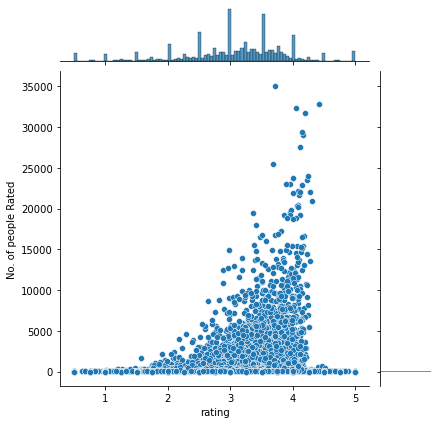

In [575]:
sns.jointplot(x=rating_data['rating'],y=rating_data['No. of people Rated']);

>The graph is bell shaped which means that the rating data is normally distributed


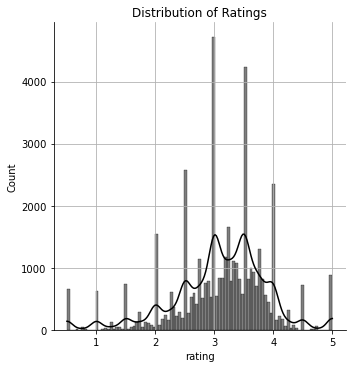

In [576]:
# lets look at the Distribution of Ratings across the Movies

sns.displot(x=rating_data['rating'], color = 'black',kde=True,height=5)
plt.title('Distribution of Ratings')
plt.grid()

### <a id="four.ninet"></a> 4.9  *Line Graph showing number of movies released by year*

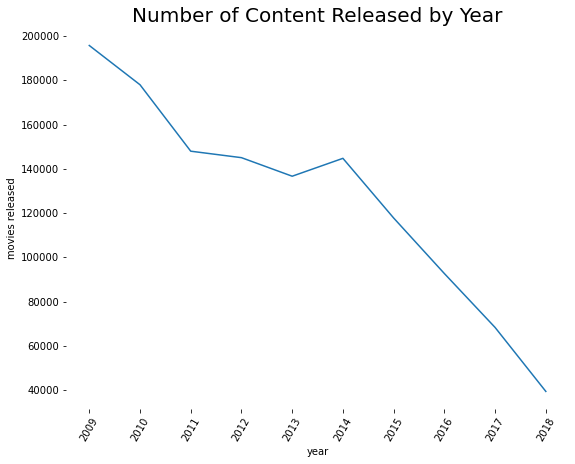

In [577]:
release = df_movie_R['year'].value_counts()
release = release.sort_index(ascending=True)

plt.figure(figsize=(9,7))
plt.plot(release[-11:-1])
#plt.scatter(release[-11:-1].index, release[-11:-1].values, s=0.5*release[-11:-1].values, c='Red');
plt.box(on=None);
plt.xticks(rotation = 60)
plt.xticks(release[-11:-1].index);
plt.title('Number of Content Released by Year', fontsize=20)
plt.xlabel('year')
plt.ylabel('movies released');

### <a id="four.ten"></a> 4.10  *Looking at run times of movies*

In [578]:
# Looking at the unique valuesof run time of movies
df_imdb_data['runtime'].unique()

runtimes = []

for runtime in df_imdb_data['runtime']:
    if runtime < 50:
        runtimes.append('Short')
    elif runtime < 80:
        runtimes.append('Below minimum')
    elif runtime < 180:
        runtimes.append('Feature-length')
    elif runtime < 300:
        runtimes.append('Long')
    elif runtime >= 300:
        runtimes.append('VLMS')
    else:
        runtimes.append('No Info')
        
df_imdb_data['feature_length'] = runtimes




(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Feature-length'),
  Text(1, 0, 'Long'),
  Text(2, 0, 'Below minimum'),
  Text(3, 0, 'VLMS'),
  Text(4, 0, 'Short')])

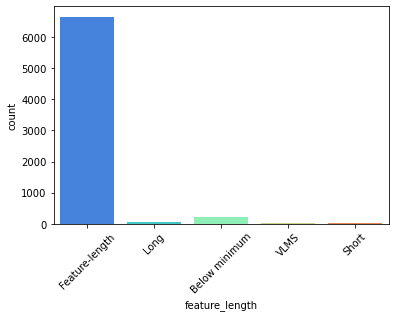

In [579]:
sns.countplot(df_imdb_data['feature_length'], palette='rainbow')
plt.xticks(rotation=45)

### <a id="four.eleven"></a> 4.11  *Distribution of run time for feature length films*

Text(0.5, 0, 'Runtime in Minutes')

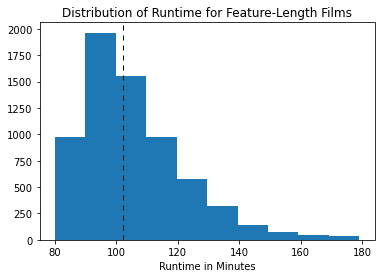

In [580]:
feature_length = df_imdb_data[df_imdb_data['feature_length'] == 'Feature-length']

plt.hist(feature_length['runtime'])
plt.axvline((feature_length['runtime'].median()), color='k', dashes=[5,5] , linewidth=1) #Create reference line
plt.title('Distribution of Runtime for Feature-Length Films')
plt.xlabel('Runtime in Minutes')

<a id="five"></a>

# **5. Modelling**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| *Description: Modelling*  |
| :--------------------------- |
| 
>In this section models will be built,namley: . |

---

<a id="six"></a>

# **6.Model Performance**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| *Description: Model performance* |
| :--------------------------- |
| 
>In this section the models that were built will be compared relative to their performance and the best model will be selected. |

---

<a id="seven"></a>

# **7. Model Explanation**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|  *Description: Model explanation*  |
| :--------------------------- |
| 
>A brief explanation is given of which model preformed the best
---

![](https://imageio.forbes.com/specials-images/dam/imageserve/966248982/660x0.jpg?format=jpg&width=960)

### <a id="seven.one"></a> 7.1 *Best Performing Model:*

### <a id="seven.two"></a> 7.2 *Conclusion*

### <a id="seven.three"></a> 7.3 *Refrence list*